# HW 6

This assignment covers all fundamental concepts required for completing a project

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Support Vector machine example](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
* [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

# Import all required library 

In [388]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Data Processing

**Q1** Get training data from the dataframe
1. Load ```HW6_data.csv``` from ```data``` folder into data frame
2. Print the head of the dataframe
3. Print the shape of the dataframe
4. Print the description of the dataframe
5. Check if the dataset has NULL values. (Show number of NULL values per column)
5. Assign ```Cover_Type``` values to Y
6. Assign rest of the column values to X

**A1** Fill the cell blocks below, Create new cell as per your necessary

In [389]:
#You can create or remove cells as per your need
df = pd.read_csv('../data/HW6_data.csv')

df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3080.0,137,18.0,166,1,1009,250.0,198,166,3635.0,...,0,0,0,0.0,0,0,0,0,0.0,1
1,2758.0,19,8.0,551,49,1766,225.0,231,124,1648.0,...,0,0,0,0.0,0,0,0,0,0.0,2
2,2779.0,86,9.0,43,-10,3889,155.0,204,123,364.0,...,0,0,0,0.0,0,0,1,0,0.0,2
3,2811.0,296,0.0,287,4,788,191.0,226,113,144.0,...,0,0,0,0.0,0,0,0,0,0.0,2
4,2956.0,314,26.0,71,22,2910,230.0,200,99,743.0,...,0,0,0,0.0,0,0,1,0,NaN,2
5,2638.0,108,11.0,396,-6,421,198.0,218,162,1307.0,...,0,0,0,0.0,0,0,0,0,0.0,2
6,2956.0,108,29.0,291,2,2786,243.0,206,162,319.0,...,1,0,0,0.0,0,0,0,0,0.0,2
7,2625.0,264,8.0,396,-6,2110,213.0,206,172,264.0,...,0,0,0,0.0,0,0,0,0,0.0,2
8,2751.0,150,25.0,263,49,1234,196.0,169,154,1336.0,...,0,0,0,0.0,0,0,0,0,1.0,2
9,2947.0,83,22.0,662,-5,391,229.0,220,184,1566.0,...,0,0,0,0.0,0,0,0,0,0.0,2


In [390]:
df.shape

(80000, 55)

In [391]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,79433.000000,80000.000000,79346.000000,80000.000000,80000.000000,80000.000000,79200.000000,80000.000000,80000.000000,78870.000000,...,80000.000000,80000.000000,80000.000000,79720.000000,80000.000000,80000.000000,80000.000000,80000.000000,75000.000000,80000.000000
mean,2981.436531,151.634175,15.092494,271.564212,51.510737,1770.080712,211.786818,221.069125,140.711750,1578.058615,...,0.038150,0.037687,0.011838,0.015429,0.010812,0.012538,0.040325,0.039163,0.030707,1.770725
std,287.979705,109.945631,8.528153,227.532197,68.091489,1318.661060,30.822278,22.191030,43.859689,1125.780446,...,0.191559,0.190441,0.108155,0.123252,0.103420,0.111268,0.196722,0.193983,0.172523,0.892577
min,1813.000000,-29.000000,-3.000000,-43.000000,-276.000000,-238.000000,10.000000,69.000000,-48.000000,-218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2762.000000,60.000000,9.000000,111.000000,4.000000,821.000000,198.000000,210.000000,115.000000,782.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2967.000000,122.000000,14.000000,212.000000,31.000000,1440.000000,218.000000,224.000000,142.000000,1362.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3217.000000,246.000000,20.000000,361.000000,78.000000,2366.000000,233.000000,237.000000,169.000000,2082.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4271.000000,400.000000,61.000000,1544.000000,562.000000,7604.000000,293.000000,264.000000,268.000000,8011.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [392]:
# check if there is NaN in the dataset
print( df.isnull().sum() )

#Drop NaNs if there is any
df = df.dropna()

Y= df['Cover_Type'].values
X= df.drop( columns=['Cover_Type'] ).values

Elevation                              567
Aspect                                   0
Slope                                  654
Horizontal_Distance_To_Hydrology         0
Vertical_Distance_To_Hydrology           0
Horizontal_Distance_To_Roadways          0
Hillshade_9am                          800
Hillshade_Noon                           0
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points    1130
Wilderness_Area1                         0
Wilderness_Area2                         0
Wilderness_Area3                         0
Wilderness_Area4                         0
Soil_Type1                               0
Soil_Type2                               0
Soil_Type3                               0
Soil_Type4                               0
Soil_Type5                               0
Soil_Type6                               0
Soil_Type7                               0
Soil_Type8                               0
Soil_Type9                               0
Soil_Type10

**Q2:** Open-Ended Questions: Observe the range of all feature values and statistical information from the dataframe description above.
1. If the dataset has NULL values, Give proper justification about the methods you will use to replace NULL values for specific columns.  
2. Do you think in our dataset normalization is required? -- Give proper justification based on your opinion. 
3. What type of normalization/Scaling technique you whould recommend for our dataset?

**A2** 

```Answer 1:``` 
I first check the dataframe for NULL values with df.isnull().sum(). I then remove the rows containing them, by setting the dataframe equal to df.dropna().

```Answer 2:```
The removal of Nan value is necessary for tuning out incomplete data and preventing data imbalance. It is also critical to have only valid values in the dataset when for numerical calculations.

```Answer 3:```
Because attributes such as elevation scale are numerically greater than most of the other attributes in the data frame, we can use the standard scaler to normalization to preserve relative relationships between attributes by scaling the features to have a near 0 mean and a standard deviation of 1.

**Q3:** 
1. Replace the null values with the best possible methods from your above observation
1. Use the above mentioned normalization technique on our HW_6 dataset.
2. Transform the X dataframe using choosen normalization technique. 

### ```Note:``` Make sure the scaled X has all column name same as ```X dataframe```

**A3** Fill the cell blocks below, Create new cell as per your necessary

In [393]:
# Replace NULLs
#You can create or remove cells as per your need

# removed NULLs prior to assigning values to X

In [394]:
# Normalize data
#You can create or remove cells as per your need
scaler = StandardScaler()
Scaled_X = scaler.fit_transform( X )

**Q4:** 

1. Check again and show if there is any null values left in our ```Scaled_X```.
2. Print all unique values/ different class id from the ```Y data```.


**A4** Fill the cell blocks below, Create new cell as per your necessary

In [395]:
#You can create or remove cells as per your need
np.isnan( Scaled_X ).sum()

0

In [396]:
np.unique( Y ) 

array([1, 2, 3, 4, 6, 7], dtype=int64)

## Part 1: Use a subset of whole data(N=20000) for Data Visualization



**Data Subset Creation**

1. First we are Selecting ```N=20000``` random rows from our original dataset which is ```df``` and create a new subset of data.

2. Using the below **rndperm** and selecting first N index from the ```Scaled_X``` and ```Y```

In [397]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 20000
data_subset_x = Scaled_X[rndperm[:N],:].copy()
data_subset_y = Y[rndperm[:N]].copy()

print( data_subset_x.shape )

(20000, 54)


**Q5:**

1. Use PCA and reduce the dimension of the **data_subset_x** into ```3```.
2. Store the PCA reuslt into ```pca_result``` variable
3. Add the results from the PCA into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


**A5** Fill the below cells. Use extra cells as per your necessary

In [398]:
#You can create or remove cells as per your need
pca = PCA( n_components=3 )
pca_result = pca.fit_transform( data_subset_x )
pca_result.shape

(20000, 3)

In [399]:
pca_df = pd.DataFrame( pca_result, columns=[ 'PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3' ] )

# Concatenate pca_df with data_subset_x along the columns axis
data_subset_x = np.concatenate( (data_subset_x, pca_df), axis=1 )

**Q6:**

1. Use TSNE and reduce the dimension of the **data_subset_x** into ```2```.
2. Store the TSNE reuslt into ```tsne_results``` variable
3. Add the resutls from the T-SNE into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


```Note:``` 
1. You can use ```from sklearn.manifold import TSNE``` for TSNE initialization.
2. Give value of n_components as per the question.
3. Also use other parameters while TSNE initialization as, ```verbose=1, perplexity=40, n_iter=300```

**A6** Fill the below cells. Use extra cells as per your necessary

In [400]:
#You can create or remove cells as per your need
tsne = TSNE( n_components=2, verbose=1, perplexity=40, n_iter=300 )
tsne_results = tsne.fit_transform( data_subset_x )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.002s...


[t-SNE] Computed neighbors for 20000 samples in 0.849s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sample 13000 / 20000
[t-SNE] Computed conditional probabilities for sample 14000 / 20000

In [401]:
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE_Component_1', 'TSNE_Component_2'])

# Concatenate data_subset_x with tsne_df along the columns axis
data_subset_x = np.concatenate((data_subset_x, tsne_df), axis=1)

**Q7:**

1. Create a new dataframe with name ```df_plot```
2. This dataframe will merge everything from **data_subset_x** and **data_subset_y**
3. We need to give a name for the ```data_subset_y``` column. Use ```Cover_Type``` as the name of the column


**A7** Fill the below cells. Use extra cells as per your necessary

In [402]:
df_plot = pd.concat( [ pd.DataFrame(data_subset_x), pd.DataFrame(data_subset_y, columns=['Cover_Type']) ], axis=1 )
df_plot.columns


Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12,           13,           14,
                 15,           16,           17,           18,           19,
                 20,           21,           22,           23,           24,
                 25,           26,           27,           28,           29,
                 30,           31,           32,           33,           34,
                 35,           36,           37,           38,           39,
                 40,           41,           42,           43,           44,
                 45,           46,           47,           48,           49,
                 50,           51,           52,           53,           54,
                 55,           56,           57,           58, 'Cover_Type'],
      dtype='object')

**Q8:** Now we will plot all points from our dataframe ```df_plot``` Using the result from **PCA**

1. Use ```pca-one``` and ```pca-two``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.

```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Fall/blob/main/project/Data_Viz_with_PCA_TSNE.ipynb

**A8** Fill the below cells. Use extra cells as per your necessary

Text(0, 0.5, 'PCA Component 2')

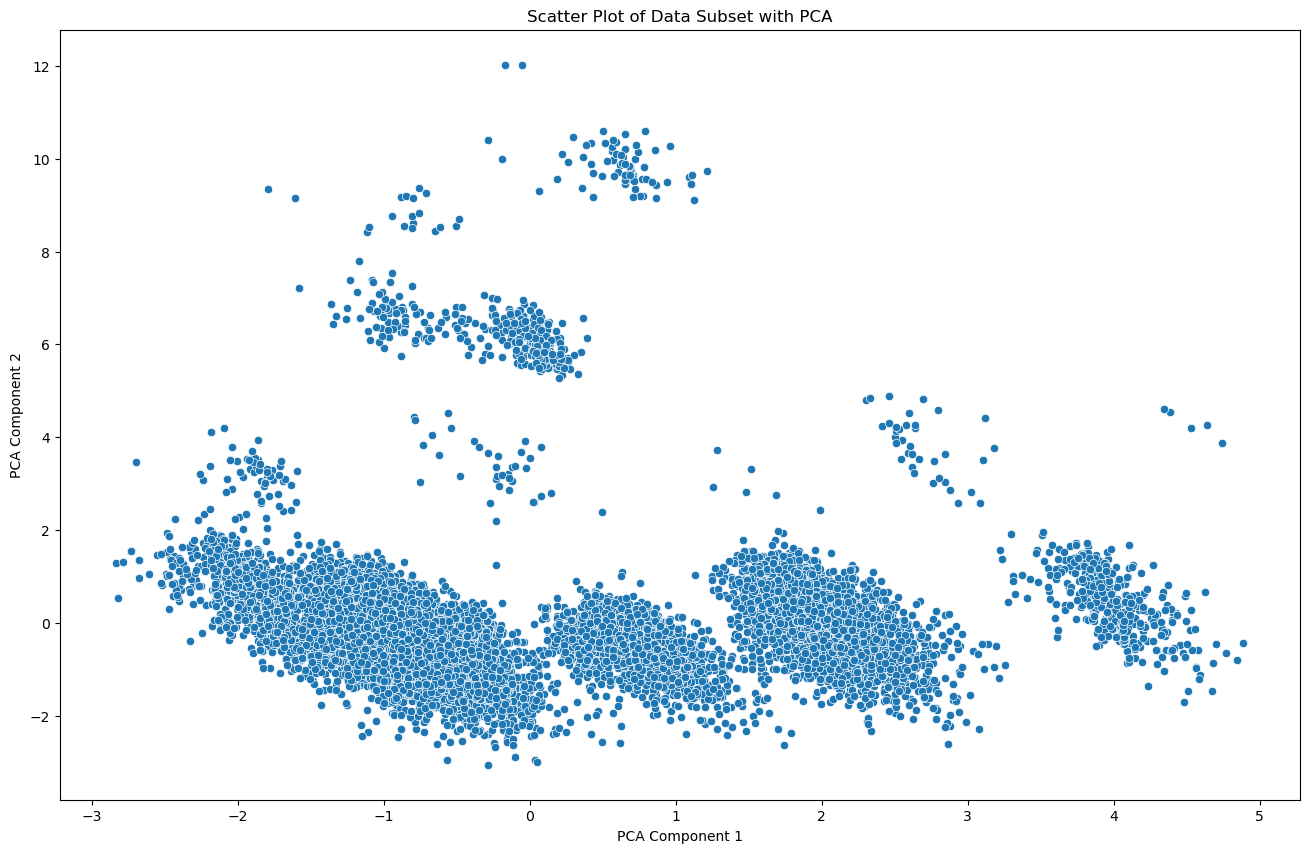

In [403]:
plt.figure(figsize=(16,10))
sns.scatterplot( data=df_plot, x=data_subset_x[:, 54], y=data_subset_x[:, 55] )
plt.title('Scatter Plot of Data Subset with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

**Q9:** Now we will plot all points from our dataframe ```df_plot``` Using result from T-SNE.

1. Use ```tsne-2d-one``` and ```tsne-2d-one``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.


```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Fall/blob/main/project/Data_Viz_with_PCA_TSNE.ipynb

**A9** Fill the below cells. Use extra cells as per your necessary

Text(0, 0.5, 't-SNE Component 2')

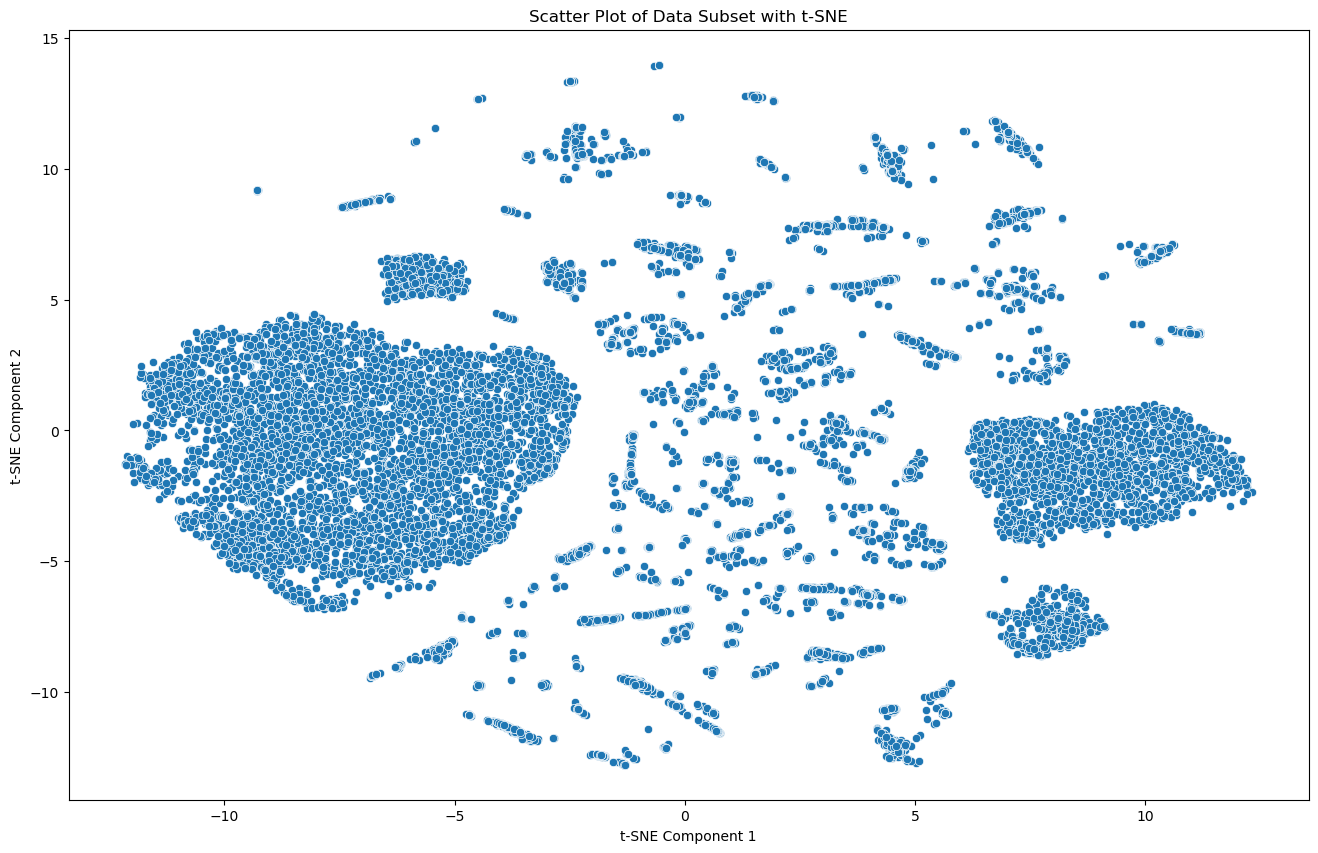

In [404]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=data_subset_x[:, 57], y=data_subset_x[:, 58], data=df_plot)
plt.title('Scatter Plot of Data Subset with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

## Part 2: Data Analysis and Classification Using Entire Dataset

**Q10:** Observe the data plotting and find the realtion between datapoints and their characteristics.


1. Reduce the dimension of our ```Scaled_X``` dataframe to ```3``` using PCA algorithm.
2. Store the result into a variable named ```pca_result```
3. Create Train data and Test data using the pca_result and Y.

```Note:``` 
1. Consider pca_result as X values, and Y as y values.
2. You can use sklearn train_test_split
3. Keep Train and Test ratio as : 75%:25%

**A10** Fill the below cells. Use extra cells as per your necessary

In [405]:
#You can create or remove cells as per your need
pca = PCA( n_components=3 )
pca_result = pca.fit_transform( Scaled_X )

In [406]:
x_train,x_test,y_train,y_test = train_test_split( pca_result, Y, test_size=0.25 )

### Now, Select Three best model for our dataset. You have to decide three models which might work well with our dataset. 

**Q11** 

**Model Number 1** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A11** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```




In [407]:
# The data appears to be multidimentional and polymorphic, the random forest classifier is built to handle multidimensional data 
# with robust overfitting.
# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier()

rf_model.fit( x_train, y_train )

rf_score = rf_model.score( x_test, y_test )
print( "Random Forest Classifier Test Score:", rf_score )

Random Forest Classifier Test Score: 0.7968758416374899


**Q12** 

**Model Number 2** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A12** Fill the below cells. Use extra cells as per your necessaryReplace ??? with code in the code cell below

```Answer for Q.No:1 goes here```




In [408]:
# The data appears to be multidimentional and polymorphic, support vector machine is another classifier what works with multidimensional data, 
# that will calculate the hyperplane that best separates the classes in the feature space
# Initialize the Support Vector Machine (SVM) model
svm_model = SVC()

svm_model.fit( x_train, y_train )

svm_score = svm_model.score( x_test, y_test )
print( "Support Vector Machine (SVM) Test Score:", svm_score )

Support Vector Machine (SVM) Test Score: 0.7920818744950175


**Q13** 

**Model Number 3** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A13** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```




In [409]:
# The data appears to be multidimentional and polymorphic, gradient boosting classifier similar to the random forests, 
# gradient boosting classifier the builds self-correcting decision trees and can provide robust overfitting to multidimensional data
# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

gb_model.fit( x_train, y_train )

gb_score = gb_model.score( x_test, y_test )
print( "Gradient Boosting Classifier Test Score:", gb_score )

Gradient Boosting Classifier Test Score: 0.7999461352006464


**Q14** 


1. Plot a histogram using Y dataframe and display the per-class data distribution(number of rows per class).
2. Also print the number of rows per class as numeric value.

**A14** Fill the below cells. Use extra cells as per your necessary

(array([0.0000e+00, 2.7212e+04, 4.2143e+04, 3.5330e+03, 6.0000e+00,
        0.0000e+00, 2.1500e+02, 1.1490e+03]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <BarContainer object of 8 artists>)

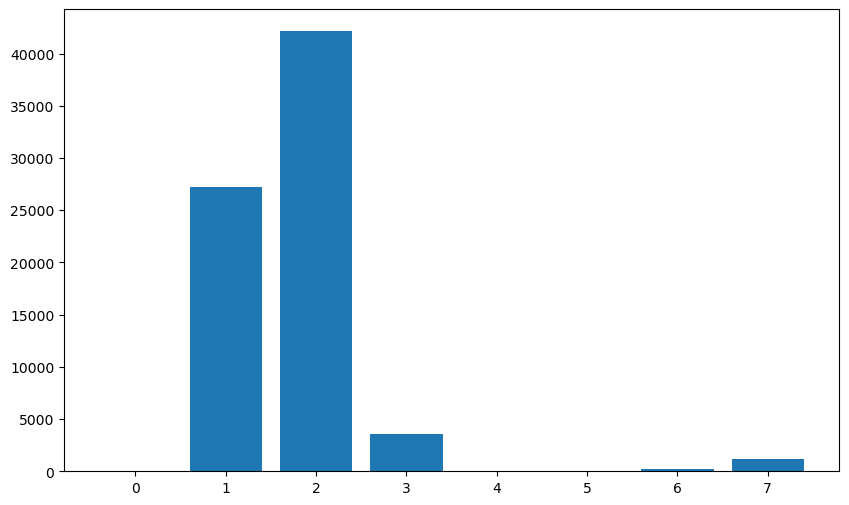

In [414]:
#You can create or remove cells as per your need
plt.figure(figsize=(10, 6))
plt.hist( Y, bins=np.arange(9) - 0.5, rwidth=0.8 )

In [417]:
for class_id in range(0, 8):
    num_rows = np.sum(Y == class_id)
    print( f"Class {class_id}: {num_rows} rows" )

Class 0: 0 rows
Class 1: 27212 rows
Class 2: 42143 rows
Class 3: 3533 rows
Class 4: 6 rows
Class 5: 0 rows
Class 6: 215 rows
Class 7: 1149 rows


**Q15** 


1. From the histogram we can see that the dataset is highly imbalanced.
2. Use a proper dataset balancing technique to make the dataset balanced.
3. Plot a histogram using new y values and display the per-class data distribution(number of rows per class).

```Note:``` Use can use the ```imblearn.over_sampling``` library for this task. But use appropriate strategy for the method.

Follow the documentation for details: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

**A15** Fill the below cells. Use extra cells as per your necessary

In [418]:
#You can create or remove cells as per your need

?
X_res, y_res=

SyntaxError: invalid syntax (1482321581.py, line 4)

In [ ]:
?

**Q16** 


1. Create new Train and Test data from the balaned X and Y value.
2. Keep Train and Test ratio as : 75%:25%

**A16** Fill the below cells. Use extra cells as per your necessary

In [ ]:
x_train,x_test,y_train,y_test = 

**Q17**

### Now, Use the previously initialized three models and calculate the score from our new balanced dataset.



**Model Number 1** 

1. Fit the model with the new train data(Use the previous Model 1) 
2. Get the score from the model using  new test data

**A17** Fill the below cells. Use extra cells as per your necessary

In [ ]:
#You can create or remove cells as per your need

**Model Number 2** 

1. Fit the model with the new train data(Use the previous Model 2) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [ ]:
#You can create or remove cells as per your need

**Model Number 3** 

1. Fit the model with the new train data(Use the previous Model 3) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [ ]:
#You can create or remove cells as per your need

### After making the dataset balanced we can see a significant improve in the performence for all three models.